<center><h1>Aprendendo Matemática com Python</h1></center>
<center><h2>Curso de Extensão</h2></center>
<center><h3>Fernando Deeke Sasse</h3></center>
<center><h3>CCT - UDESC</h3></center>
<center><h2>NumPy: Gráficos, Raízes e Derivadas</h2></center>

### 1. Introdução 

Apresentaremos neste *notebook* aplicações da biblioteca NumPy a problemas envolvendo o estudo de funções a solução de problemas práticos de engenharia. Normalmente tais tópicos seriam mais apropriados para um curso de cálculo numérico. No entanto, nosso objetivo é mostrar que muitos problemas desse tipo podem ser resulvidos com simples operações com *1-arrays*. 
Após o estudo deste notebook você será capaz de:

- Usar NumPy para fazer gráficos de funções de uma variável.
- Usar NumPy para determinar raízes reais, calcular derivadas numéricas e determinar extremos relativos de funções definidas analiticamente e numericamente. 
- Usar Numpy para realizar integração numérica de funções. 
- Resolver problemas práticos que envolvem a determinação de raízes, derivadas e integrais de funções. 

### 2. Encontrando raízes de uma função

Consideremos o problema que consiste em estudar o comportamento de uma função definida por $y=y(x)$ num dado intervalo,  determinando o gráfico de $y(x)$, suas raízes e seus extremos relativos. Como exemplo, tomaremos a função:
$$
y(x) = x^4-3x^3-2x^2+5x+4\,,\qquad (1)
$$
no intervalo $[-10,10]$.
Tal função não é muito complicada, mas tem o propósito de servir como teste para um método que pode ser aplicado a funções muito mais complicadas. 

Para encontrar raízes reais da função (1) é interessante antes conhecer qualitativamente seu comportamento no intervalo de interesse graficamente. Passemos à tarefa inicial de definir a função e construir seu gráfico. 
Devemos inicialmente carregar os módulos Numpy e Matplotlib: 

In [188]:
import numpy as np
import matplotlib.pyplot as plt

Para fazer um gráfico devemos definir os valores de $x$ nos quais $y(x)$ será calculada.
Como o intervalo $[-10,10]$ já foi prescrito, devemos estabelecer o número de pontos nesse intervalo. É uma boa prática usar o menor número possível de pontos para que resulte num bom gráfico. No presente caso, 100 pontos já geram um bom gráfico:

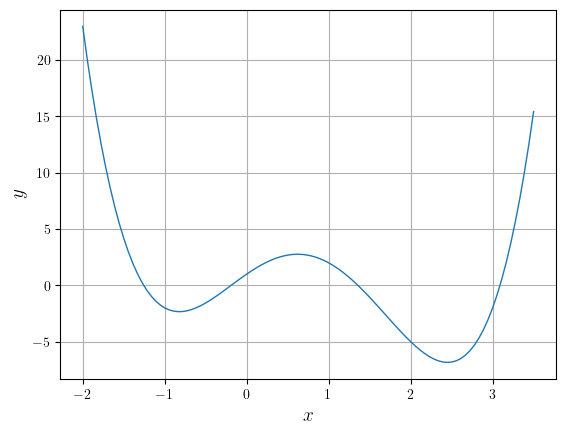

In [249]:
x = np.linspace(-2,3.5,100) 
y = x**4-3*x**3-2*x**2+5*x+1
plt.figure(dpi=100)
plt.rcParams['text.usetex'] = True
plt.plot(x,y,linewidth=1.0)
plt.xlabel('$x$',size = 14)
plt.ylabel('$y$',size = 14)
plt.grid(True)
plt.show()

O gráfico obtido acima mostra que temos 4 raízes reais no intervalo $[-2,3.5]$. Em vez de usar as técnicas clássicas de cálculo numérico para determinar as raízes reais de $y(x)$, usaremos Numpy para determinar em que pontos $x$ a função troca de sinal. Para isso devemos determinar produto de cada par de termos vizinhos de $y$ e verificar quando este é negativo. Geramos um array booleano da forma:

In [194]:
y[1:]*y[:-1]<0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False])

Se usarmos tal array booleano como índice, somente os valores de x com índice True, que correspondem às raízes, são selecionados:

In [197]:
R = x[1:][y[1:]*y[:-1]<0]
R 

array([-1.22222222, -0.16666667,  1.38888889,  3.11111111])

Tais resultados estão de acordo com uma inspeção do gráfico de $y(x)$.
Verifiquemos a acurácia do resultado. Para isso é interessante definirmos a função $f(x)=y(x)$:

In [200]:
def f(x):
    return x**4-3*x**3-2*x**2+5*x+1

de modo que agora podemos avaliar $f(x)$ facilmente: 

In [203]:
f(R)

array([-0.38987959,  0.1257716 , -0.23004306,  0.54336229])

Com um array de 100 elementos a acurácia não é muito boa. Um resultado melhor pode de ser obtido com um array de $10^6$ elementos:

In [209]:
x = np.linspace(-2,3.5,10**6) 
y = x**4-3*x**3-2*x**2+5*x+1
R = x[1:][y[1:]*y[:-1]<0]
R

array([-1.25618476, -0.18993719,  1.35650486,  3.08963359])

Verifiquemos novamente a acurácia do resultado:

In [211]:
f(R)

array([-6.04474788e-05,  1.98654250e-05, -3.44305649e-05,  7.20423450e-05])

Agora temos um resultado  razoável. Podemos definir uma função que tem como entrada os arrays `y` e `x`
 e como saída as raízes no intervalo definido pelo array `x`:

In [214]:
def raizes(y,x):
    return x[1:][y[1:]*y[:-1]<0]

Por exemplo, para encontrar a raiz que está entre -2 e -1 basta usar a função raizes do seguinte modo: 

In [217]:
x = np.linspace(-2,-1,10**6) 
y = x**4-3*x**3-2*x**2+5*x+1
raizes(y,x)

array([-1.25618926])

### 3. Estudo de funções definidas algébricamente
Extremos relativos de uma função ocorrem em pontos $x^{*}$ do intervalo onde $y'(x^{*})=0$. Veremos com determinar  $y'(x)$ numericamente no intervalo $[1,10]$, usando Numpy, supondo que a relação $y=y(x)$ é definida algebricamente, como na sub

seção anterior. Em seguida determinaremos os pontos onde a função possui um extremo relativo. Utilizaremos aqui da idéia fundamental da derivada como o limite de uma diferença finita calculada na vizinhança de um ponto, ou seja, 
$$
    y'(x)=\lim_{h\rightarrow 0}\frac{y(x+h)-f(x)}{h}\,.
$$
A chamada \emph{aproximação de primeira ordem avançada para a primeira derivada} consiste em tornar a expressão acima uma igualdade para $h=\Delta x$ suficientemente pequeno:
$$
    y'(x)\approx \frac{y(x+h)-f(x)}{h}\,.
$$
Essa é uma aproximação de primeira ordem, pois o erro cometido é proporcional a $h$. 
Um modo elementar de realizar tal operação em Python é o seguinte:

In [56]:
def derivada1(f, x, h):
    return (f(x + h) - f(x)) / h

Podemos, com isso, calcular a derivada em um $x$ qualquer.

#### Exemplo 3.1 
(i) Seja 

$$
f(x)=x^4-3x^3-2x^2+5x+1\,.
$$

Calcule $f'(2)$.

Definimos a função:

In [76]:
def f(x):
    return x**4-3*x**3-2*x**2+5*x+1

Aplicando nossa função `derivada1`, com $h=10^{-5}$, temos:

In [154]:
derivada1(f,2,10**(-5))

-6.999959999909321

(ii) Determine o gráfico da derivada. 

Podemos usar tal função para construir o gráfico da derivada no intervalo $[-1,3]$. Para isso basta aplicar a função derivada1 a todos os elementos dos arrays $x$ e $y=f(x)$ e gerar o gráfico de $y'(x)$:

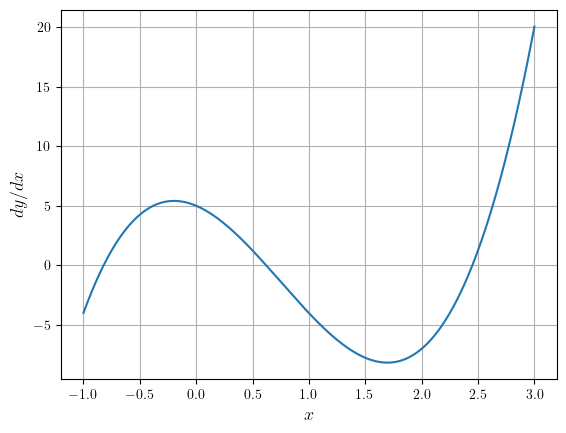

In [165]:
x = np.linspace(-1,3,10**3) 
dydx1 = derivada1(f,x,10**(-3))
plt.figure(dpi=100)
plt.rcParams['text.usetex'] = True
plt.plot(x,dydx1)
plt.xlabel('$x$', size=13)
plt.ylabel('$dy/dx$',size=13)
plt.grid(True)

(iii) Determine os extermos relativos de $f(x)$.

O gráfico acima mostra que temos 3 extremos relativos. Podemos agora encontrar os extremos determinando as raízes de $y'(x)$ no intervalo $[-1,3]$. Para ter boa acurácia, usaremos arrays com $10^6$ pontos, com $h =10^{-6}$ e redefinimos o array $x$ no intervalo $[-1,3]$, que contém todos os extremos relativos. É interessante que o leitor faça seus próprios experimentos e use os parâmetros que demandem o menor custo computacional possível para obter uma acurácia desejada. A implementação em Python é a seguinte:

In [173]:
x = np.linspace(-1,3,10**6)
dydx2 = derivada1(f,x,10**(-5))
E = x[1:][dydx2[1:]*dydx2[:-1]<0]
E

array([-0.82121982,  0.62129762,  2.44991145])

Tais resultados estão compatíveis com aquele esperado a partir de uma isnpeção do gráfico. Alternativamente podemos usar o comando `np.gradient` para determinar o array de derivadas:

In [176]:
x = np.linspace(-2,3,10**6)
dydx3 = np.gradient(f(x),x)
E = x[1:][dydx3[1:]*dydx3[:-1]<0]
E

array([-0.82121382,  0.62130262,  2.44991945])

de modo que o resultado é similar. 

#### Exemplo 3.2
Seja $y=\mathrm{e}^{-x/14}\cos x$. Utilize $10^4$ intervalos no domínio $[0,10]$.

(i) Faça o gráfico de $y(x)$.<br>
(ii) Determine a média e o desvio-padrão de $y$ para valores de $x$ no intervalo $[4,7]$.<br>
(iii) Determine $y_{80}$ de modo que $80\%$ dos valores de $y$ estejam abaixo de $y_m$, no intervalor $[4,7]$.<br>
(iv) Faça o gráfico de $dy/dx$. <br>
(v) Determine os extremos relativos de $y(x)$. 

In [107]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# (i)
N = 10000
x = np.linspace(0,10,N+1)

Notemos que há $N+1$ termos especificados em `linspace`, pois 0 e 10 estão incluídos no intervalo. De fato, 

In [112]:
x[N]

10.0

Façamos um gráfico simples:

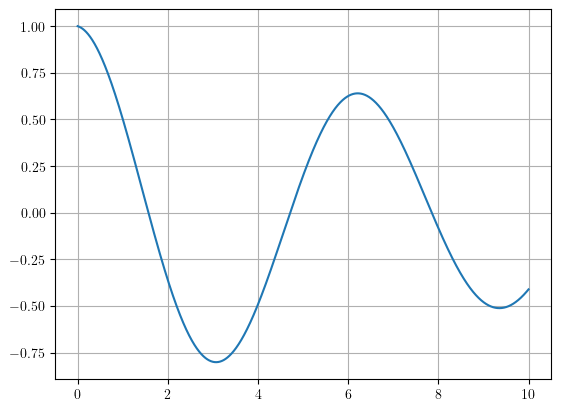

In [115]:
y = np.exp(-x/14)*np.cos(x)
plt.plot(x,y)
plt.grid(True)

(ii) Determine a média e o desvio-padrão de $y$ para valores de $x$ no intervalo $[4,7]$

Notemos que

In [119]:
(x>=4)*(x<=7)

array([False, False, False, ..., False, False, False])

Portanto, 

In [122]:
y[(x>=4)*(x<=7)]

array([-0.49119834, -0.49059433, -0.48998991, ...,  0.45812632,
        0.45769578,  0.45726483])

De modo equivalente,

In [125]:
bol_and = np.logical_and(x >=4, x <= 7)

In [127]:
y[bol_and]

array([-0.49119834, -0.49059433, -0.48998991, ...,  0.45812632,
        0.45769578,  0.45726483])

In [129]:
# Média
np.mean(y[(x>=4)*(x<7)])

0.29813831898311477

In [131]:
# Desvio padrão
np.std(y[(x>=4)*(x<=7)])

0.35190695732454863

(iii) Determine $y_{80}$ de modo que $80\%$ dos valores de $y$ estejam abaixo de $y_{80}$, no intervalor $[4,7]$.

In [134]:
np.percentile(y[(x>=4)*(x<=7)],80)

0.611289718860063

(iv) Faça o gráfico de $dy/dx$. 

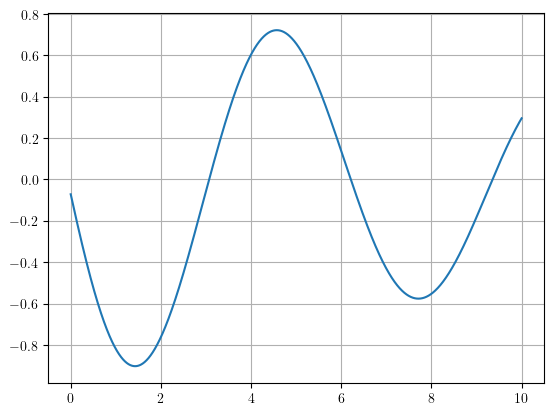

In [137]:
plt.plot(x,np.gradient(y,x))
plt.grid(True)

(v) Determine os extremos relativos de $y(x)$. 

Formamos o array das derivadas: 

In [144]:
N = 10000
x = np.linspace(0,10,N+1)
y = np.exp(-x/14)*np.cos(x)
dydx = np.gradient(y,x)

Determinamos os zeros do array `dydx`:

In [146]:
E = x[1:][dydx[1:]*dydx[:-1]<0]
E

array([3.071, 6.212, 9.354])

### 4. Estudo de funções definidas numericamente

Nem sempre em um problema prático temos uma função definida algebricamente. Em muitos casos a função é definida por meio de dados observacionais ou experimentais. Nesse caso, os arrays $x$ e $y(x)$ são dados previamente, de modo que podemos usar a aproximação da diferença finita avançada e atrasada, dadas respectivamente por:
\begin{align}
&y'_{+}(x_i)\approx \frac{y(x_{i+1})-y(x_i)}{\Delta x}\,,\\
&y'_{-}(x_i)\approx  \frac{y(x_{i})-y(x_{i-1})}{\Delta x}\,,
\end{align}
sendo $\Delta x_i = x_{i+1}-x_i= x_1-x_0$, supondo que os elementos do array $x$ estão todos igualmente espaçados. Podemos implementar tais fórmulas em Python do seguinte modo:

In [185]:
def derivada2(y,x):
    dy = np.zeros_like(y, dtype=float)
    dx = x[1] - x[0] 
    dy[:-1] = (y[1:] - y[:-1]) 
    dy[-1] = (y[-1] - y[-2]) # diferença atrasada para o último termo
    return dy/dx

Notemos que y[1:]  é o array formado pelos elementos de `y`, do segundo ao último e y[:-1] é o array formado por elementos de `y` do primeiro ao penúltimo.

#### Exemplo 4.1
Para testar a função `derivada2` definida acima vamos gerar 100 pontos a partir da função

$$
f(x)=x^4-3x^3-2x^2+5x+1\,.
$$

no intervalo $[-2,3]$:

In [188]:
x = np.linspace(-2,3,10**2) 
y = x**4-3*x**3-2*x**2+5*x+1
dydx3 = derivada2(y,x)

Os extremos nesse intervalo são dados por

In [191]:
E2 = x[1:][dydx3[1:]*dydx3[:-1]<0]
E2

array([-0.83838384,  0.62626263,  2.44444444])

Podemos novamente usar o comando `gradient`: 

In [199]:
x = np.linspace(-2,3,10**2) 
y = x**4-3*x**3-2*x**2+5*x+1
dydx4 = np.gradient(y,x)
E3 = x[1:][dydx4[1:]*dydx4[:-1]<0]
E3

array([-0.78787879,  0.62626263,  2.49494949])

Notemos que este último resultado não é tão bom quanto aquele fornecido por `derivada2`.

### 5. Aplicações

#### Exemplo 5.1:  Circuito RCL em paralelo

Um circuito com um resistor de resistência $R$, um indutor de indutâncial $L$ e um capacitor de capacitância $C$, quando conectados em paralelo, apresenta uma indutância dada por 

$$
\frac{1}{Z} = \sqrt{\frac{1}{R^2}+\left(\omega C-\frac{1}{\omega L}\right)^2}\,.
$$

Determinemos a frequência $\omega$ quando $Z=70\,\Omega$, $R=1\,k\Omega$, $L=0.8\,H$ e $C=10\,\mu F$.

Inicialmente definimos a função em Python e os valores dos parâmetros:

In [1004]:
def f(Z,R,C,L,omega):
    return 1/Z-np.sqrt(1/R**2+(omega*C-1/(omega*L))**2)

In [1006]:
Z = 70
R = 1000
L = 0.8
C = 10e-6

Se não temos experiência prévia sobre possíveis valores de $\omega$ devemos fazer uma exploração gráfica sobre a localização da raiz. Poucas tentativas nos conduzem ao gráfico:

<Figure size 700x300 with 0 Axes>

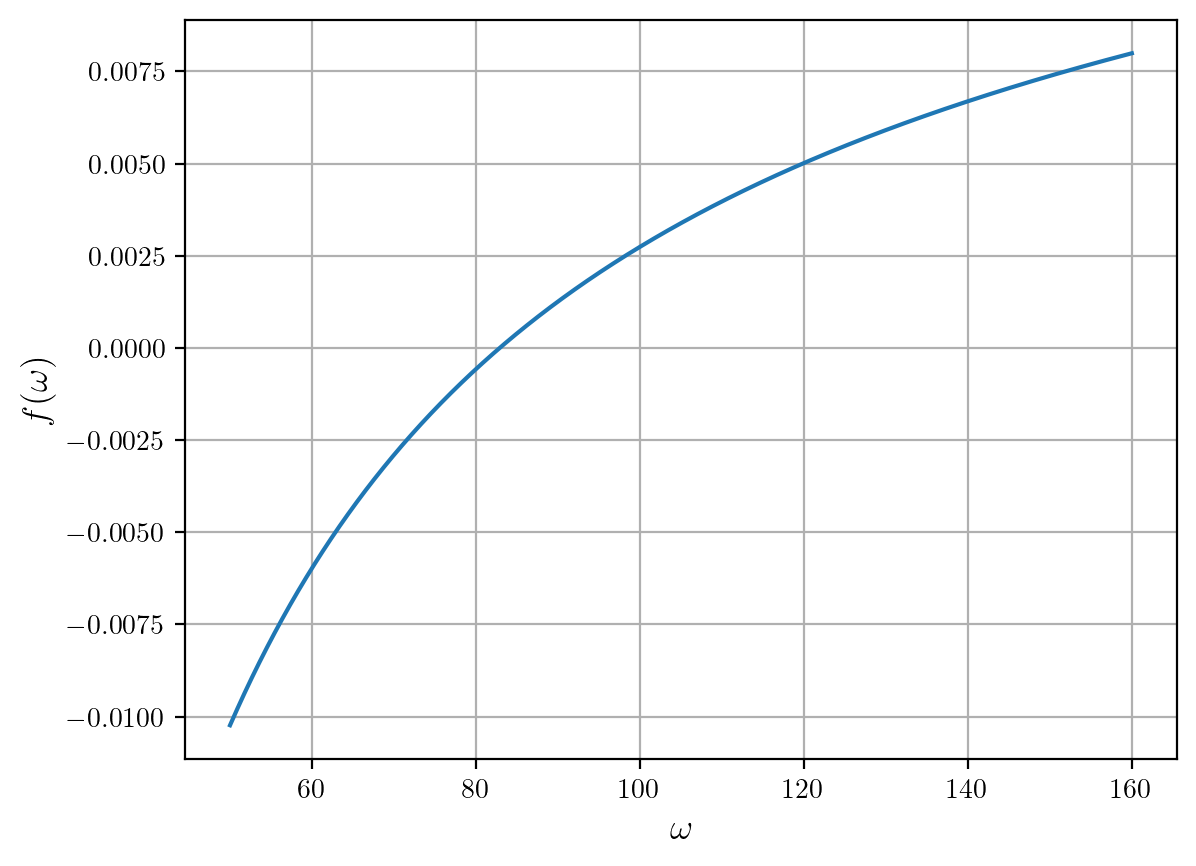

In [1019]:
omega = np.linspace(50,160,10000)
plt.figure(figsize=(7, 3))
plt.figure(dpi=200)
plt.rcParams['text.usetex'] = True
plt.plot(omega,f(Z,R,C,L,omega))
plt.rcParams['text.usetex'] = True
plt.xlabel(r'$\omega$', size = 13)
plt.ylabel(r'$f(\omega)$', size = 13)
plt.grid(True)

Portanto, a frequência que buscamos deve estar próxima a $\omega = 81\, s^{-1}$. Para maior eficiência redefinimos a malha em torno da raiz:

In [312]:
omega = np.linspace(80,85,10000)
y = f(Z,R,C,L,omega)

Podemos agora encontrar a raiz usando nosso método descrito anteriormente:

In [319]:
W = omega[1:][y[1:]*y[:-1]<0]
W

array([82.89378938])

Ou seja, $\omega = 82,89\,s^{-1}$.
Para uma aplicação, uma acurácia de 3 dígitos já seria suficiente. No entanto, para verificar a eficiência do método calculamos:

In [322]:
f(Z,R,C,L,W)

array([7.15889249e-08])

o que é bastante razoável, dada a simplicidade do procedimento. 

#### Exemplo 5.2: Ruído em um sinal

Suponhamos que temos 1000 amostras de um sinal dependente do tempo, quase periódico, com ruído e queremos caracterizar tal sinal, no que diz respeito ao ruído, pelo número de extremos relativos que ocorrem num dado intervalo de tempo. Simularemos tal sinal por meio da função

In [377]:
t= np.linspace(0, 10, 1000)
y = np.sin(2 * np.pi * 1.5 * t) + 0.2 * np.sin(2 * np.pi * 2 * t) \
+np.random.normal(0, 0.09, len(t))

O gráfico de $y(t)$ é mostrado a seguir:

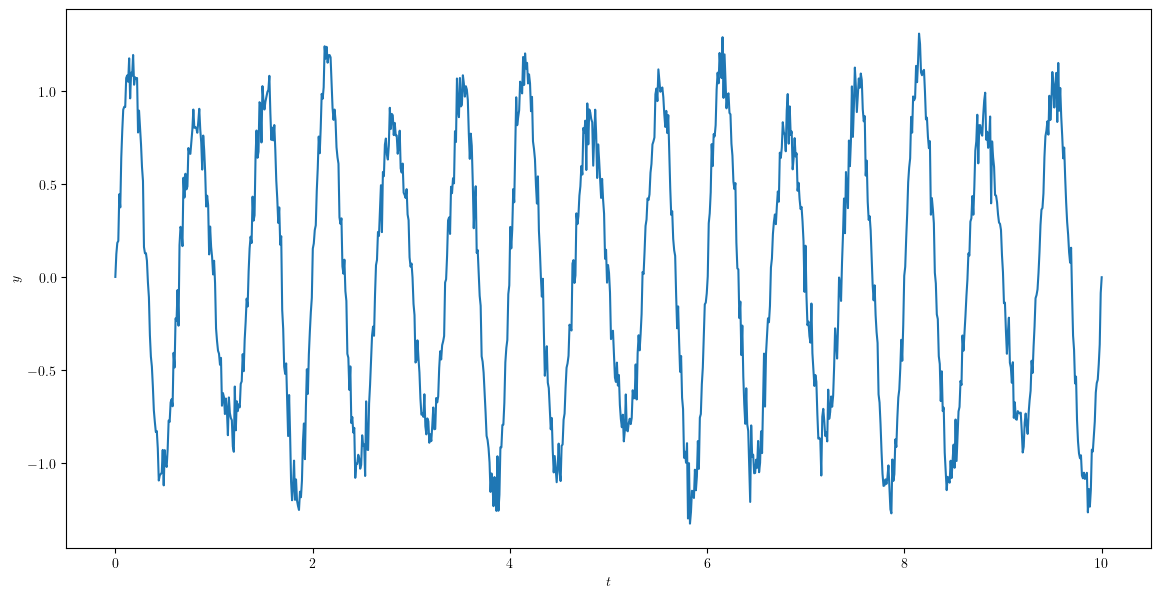

In [380]:
plt.figure(figsize=(14, 7))
plt.plot(t, y)
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.show()

Uma possível medida de ruído desse sinal pode ser feita por meio da contagem dos seus extremos relativos. Em Python:

In [386]:
def derivada2(y,x):
    dy = np.zeros_like(y, dtype=float)
    dx = x[1] - x[0] 
    dy[:-1] = (y[1:] - y[:-1]) 
    dy[-1] = (y[-1] - y[-2]) # diferença atrasada para o último termo
    return dy/dx

In [388]:
dydt = derivada2(y,t)
E = t[1:][dydt[1:]*dydt[:-1]<0]
len(E)

518

#### Exemplo 5.3: Equação de Kepler

1. A [equação de Kepler](https://en.wikipedia.org/wiki/Kepler%27s_equation) descreve o movimento de corpos celestes no plano, sendo dada por

$$
x= y-\epsilon \sin y\,.
$$

A variável $x$ denota a anomalia média de um planeta, $y$ é a anomalia excêntrica e $\epsilon$ é a excetricidade da órbita. Tomando $\epsilon=0.95$, construa uma tabela Para valores de $y$ e $x$, construa uma tabela de 10 valores igualmente espaçados de $0\leq x \leq \pi$. 

In [730]:
import numpy as np
import matplotlib.pyplot as plt

Suponhamos que $x=\pi/2$:

In [733]:
epsilon = 0.95
x = np.pi/2

Temos que encontrar o zero da função $F = y-\epsilon \sin y -x$.

In [741]:
y = np.linspace(0,4,100)
F = y-epsilon*np.sin(y)-x
Y = y[1:][F[1:]*F[:-1]<0]
Y

array([2.3030303])

Devemos repetir tal procedimento para 10 valores de $x$ tais que $x \in [0,\pi]$. Inicialmente definimos os parâmetros do problema: 

In [744]:
# Constantes
epsilon = 0.95
num_values = 10

Definimos os valores de $x$ igualmente espaçados de 0 a $\pi$:

In [747]:
# Valores de x igualmente espaçados de 0 a pi
x = np.linspace(0, np.pi, num_values)

Definimos o array `y` cujo tamanho define a acurácia da solução: 

In [750]:
# Valores de y para resolver a equação
y = np.linspace(0, 4, 1000)

Criamos uma lista inicialmente vazia onde resultados serão guardados:

In [753]:
# Lista para armazenar os resultados
resultados = []

Devemos resolver a equação de Kepler para cada valor de $x$:

In [756]:
# Resolve a equação de Kepler para cada valor de x
for X in x:
    F = y - epsilon * np.sin(y) - X
    Y = y[1:][F[1:] * F[:-1] < 0]  # Encontra as raízes onde o sinal de F muda
    if Y.size > 0:  # Checando se Y não está vazio
        resultados.append([X, Y[0]])  # Apenas a primeira raiz encontrada é considerada
    else:
        resultados.append([X, np.nan])  # Usa NaN se nenhuma raiz for encontrada

Podemos agora ver a lista de pares de resultados: 

In [759]:
resultados

[[0.0, nan],
 [0.3490658503988659, 1.2532532532532532],
 [0.6981317007977318, 1.6456456456456456],
 [1.0471975511965976, 1.937937937937938],
 [1.3962634015954636, 2.178178178178178],
 [1.7453292519943295, 2.394394394394394],
 [2.0943951023931953, 2.5945945945945947],
 [2.443460952792061, 2.7827827827827827],
 [2.792526803190927, 2.962962962962963],
 [3.141592653589793, 3.143143143143143]]

Embora não tenhamos introduzido a biblioteca Pandas, usaremos aqui um recurso simples que permite a construção de uma tabela (DataFrame) com formato de melhor estética:

In [762]:
import pandas as pd

In [764]:
# Cria tabela (DataFrame)
df = pd.DataFrame(resultados, columns=['x', 'y'])

In [766]:
df

,x,y
0,0.000000,NaN
1,0.349066,1.253253
2,0.698132,1.645646
3,1.047198,1.937938
4,1.396263,2.178178
5,1.745329,2.394394
6,2.094395,2.594595
7,2.443461,2.782783
8,2.792527,2.962963
9,3.141593,3.143143


Façamos um gráfico dos resultados:

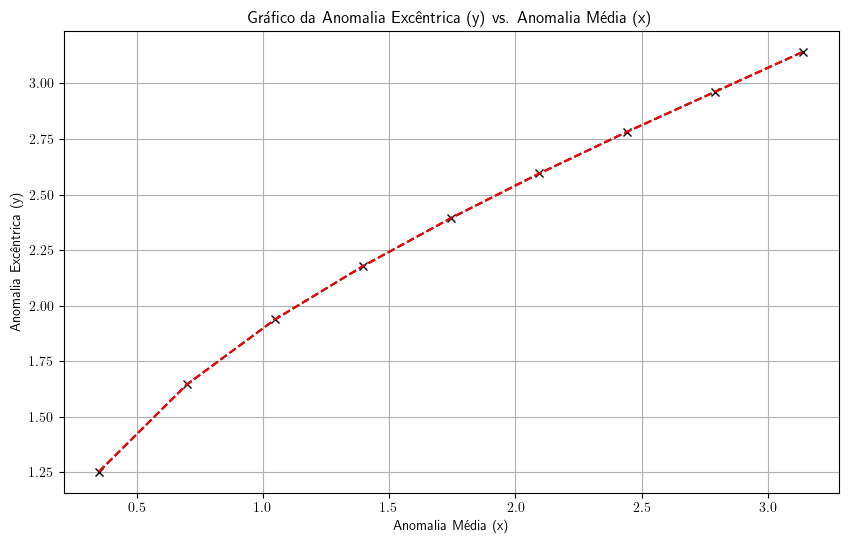

In [769]:
# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], marker='x', linestyle='dashed', color='black')
plt.plot(df['x'], df['y'], linestyle='dashed', color='red')
plt.title('Gráfico da Anomalia Excêntrica (y) vs. Anomalia Média (x)')
plt.xlabel('Anomalia Média (x)')
plt.ylabel('Anomalia Excêntrica (y)')
plt.grid(True)
plt.show()

#### Exemplo 5.4: Lançamento de um projétil

A posição vertical $y$ de um projétil, desprezando a resistência do ar é dada por

$$
y = y_0+x\tan\theta - \frac{g}{2v_0^2\,\cos^2\theta}\,x^2\,,
$$

sendo $y_0$ a altura inicial, $\theta$ o ângulo de lançamento (relativamente à direção horizontal), $g=9.807 \,m/s^2$ é a aceleração da gravidade e $x$ é o deslocamento horizontal.

Suponhamos que $v_0$ e $y_0$ são dados e temos um alvo a uma distância $x=r$, que está numa elevação $y=0$. Queremos determinar $\theta$. Devemos resolver a equação

$$
f(\theta) = y_0+x\tan\theta - \frac{g}{2v_0^2\cos^2\theta}\,x^2=0\,.
$$

Definimos o array com os valores de $\theta$ a serem examinados: 

In [1035]:
# Valores de theta para resolver a equação
theta = np.linspace(0, 1.3, 1000)    

Definimos os parâmetros do problema:

In [1038]:
# Parâmetros
g = 9.807
r = 160
y0 = 10
v0 = 50

É interessante visualizar o gráfico de $f(\theta)$:

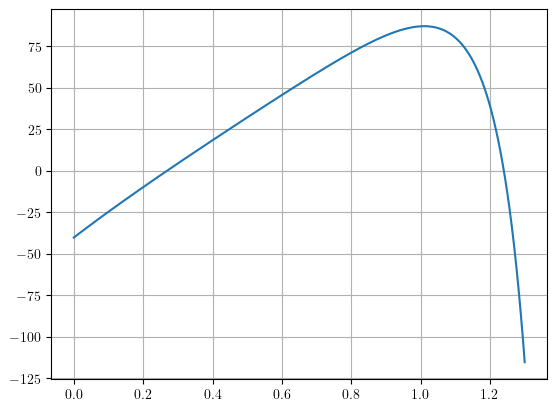

In [1041]:
f = y0+r*np.tan(theta)-g*r**2/(2*v0**2*np.cos(theta)**2)
plt.plot(theta,f)
plt.grid(True)
plt.show()

Vemos que há dois valores de $\theta$ que resolvem a equação. Determinemos as soluções analiticamente: 

In [1044]:
T = theta[1:][f[1:] * f[:-1] < 0]  # Encontra a raiz onde o sinal de f muda
T

array([0.26936937, 1.24014014])

Podemos converter para graus:

In [1047]:
T_graus = T*180/np.pi
T_graus

array([15.43372799, 71.05479603])

ou

In [1050]:
np.degrees(T)

array([15.43372799, 71.05479603])

Podemos definir uma função: 

In [1307]:
def angulo(r,v0,y0):
    g = 9.807
    f = y0+r*np.tan(theta)-g*r**2/(2*v0**2*np.cos(theta)**2)
    raiz = theta[1:][f[1:] * f[:-1] < 0]
    if len(raiz) > 0:
        return np.degrees(raiz)
    else:
        return "Não há solução"

In [1309]:
angulo(r,v0,y0)

array([15.43372799, 71.05479603])

<Figure size 500x200 with 0 Axes>

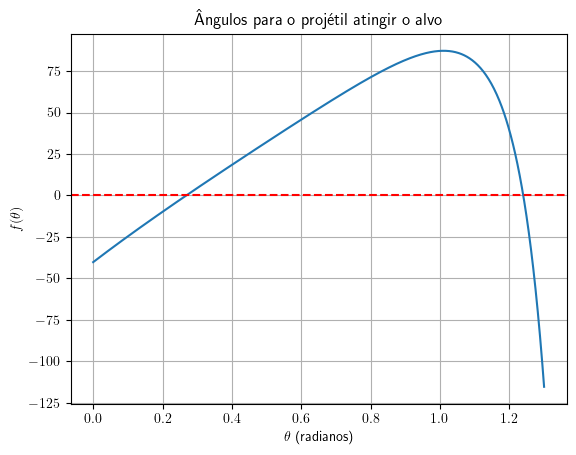

In [1446]:
plt.figure(figsize=(5, 2))
plt.figure(dpi=100)
plt.rcParams['text.usetex'] = True
plt.plot(theta, y0 + r * np.tan(theta) - g * r**2 / (2 * v0**2 * np.cos(theta)**2))
plt.axhline(0, color='red', linestyle='--')
plt.title('Ângulos para o projétil atingir o alvo')
plt.xlabel(r'$\theta$ (radianos)')  
plt.ylabel(r'$f(\theta)$')  
plt.grid(True)
plt.show()

Para uma saída mais elegante e prática, podemos usar réguas deslizantes com a biblioteca `widgets`.

In [1314]:
import ipywidgets as widgets
from IPython.display import display

In [1322]:
def interactive_plot(r, v0, y0):
    angle = angulo(r, v0, y0)
    print(f"Menor ângulo em graus para o qual o projétil atinge o alvo: {angle} ")

In [1324]:
# Criando widgets
r_slider = widgets.FloatSlider(value=160, min=50, max=300, step=10, description='Alcance (r):')
v0_slider = widgets.FloatSlider(value=50, min=10, max=100, step=5, description='Velocidade inicial (v0):')
y0_slider = widgets.FloatSlider(value=10, min=0, max=50, step=1, description='Altura inicial (y0):')

In [1326]:
# Display widgets
widgets.interactive(interactive_plot, r=r_slider, v0=v0_slider, y0=y0_slider)

interactive(children=(FloatSlider(value=160.0, description='Alcance (r):', max=300.0, min=50.0, step=10.0), Fl…

### 6. Exercícios

**1.** Determine as raízes reais da equação

$$
\mbox{e}^x-2x-3=0\,,
$$

com uma acurácia (relativa ao valor da função na raiz) de $10^{-5}$, ao menos.  

**Sugestão:** faça antes o gráfico da função definida pelo lado esquerdo da equação acima para saber a localização das raízes. Com tal informação, use o menor número possível de subintervalos para alcançar a acurácia desejada.

**2.** Seja a função definida por
   
   $$
   f(x) = \cos(x^2)-\frac{x}{3}-\frac{1}{8}\,.
   $$

(i) Determine todos os zeros de $f$ no intervalo $[-4,4]$, com acurácia de $10^{-3}$ ao menos. Tal acurácia é relativa ao valor de $f$ nas raízes determinadas. 
(ii) Determine todos os extremos relativos  no intervalo $[-4,4]$ e classifique cada um como máximo ou mínimo (use um procedimento numérico ou inspecione o gráfico). 

**3.** Refaça o problema do  Exemplo 1 (circuito RCL em paralel) e construa réguas deslizantes para os parâmetros $Z$, $R$, $C$ e $L$, tendo como saída a frequência angular $\omega$.

**4.** 
Considere um tanque para armazenar líquidos que consiste de cilindro horizontal de raio $R$ e comprimento $h$, com extremidades hemisféricas. Isso é ilustrado na Figura 1.  Suponhamos que as extremidades hemisféricas podem ser unidas para formar uma esfera de raio $R$. Suponhamos que temos dentro do tanque líquido a uma altura $h$. O volume $V_e$ na parte esférica é dado por (veja *David E. Clough, Steven C. Chapra. Introduction to Engineering and Scientific Computing with Python CRC Press*, 2023  p. 243}):

$$
V_e = \pi h^2\left(\frac{3R-h}{3}\right)\,.
$$

O volume $V_c$  na parte cilíndrica é dado por 

$$
V_c = \left[R^2 \arccos\left(\frac{R-h}{R}\right)-(R-h)\sqrt{2Rh-h^2}\right]L\,,
$$

de modo que o volume total é $V=V_e+V_c$. 
<center>
<figure>
    <img src="tanque_cilindrico.png" width="400" height="300" alt="Tanque cilíndrico" />
    <figcaption>Figure 1: Tanque cilíndrico.</figcaption>
</figure>
</center>
(a) Supondo que $L = 5\,m$ e $R = 2.5\,m$, faça uma tabela com 25 valores de $V\,(m^3)$ igualmente espaçados $(1, 7, 13, \ldots, 145)$ e os correspondentes valores de $h$. Faça também o gráfico correspondente.

(b) Construa réguas deslizantes para os valores de $L$, $R$, e $V$ mostrando como saída os respectivos valores de $h$. 
